In [3]:
import numpy as np
import matplotlib.pyplot as plt

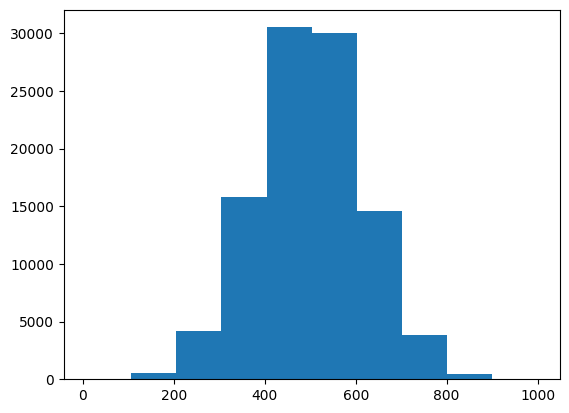

In [4]:
class MersenneTwister:
    def __init__(self, seed=5489):
        self.n = 624  # Tamaño del estado
        self.state = [0] * self.n
        self.index = self.n  # Índice inicial
        self.seed(seed)

    def seed(self, seed):
        """Inicializa la matriz de estado"""
        self.state[0] = seed
        for i in range(1, self.n):
            self.state[i] = (1812433253 * (self.state[i-1] ^ (self.state[i-1] >> 30)) + i) & 0xFFFFFFFF

    def twist(self):
        """Realiza la transformación de mezcla"""
        for i in range(self.n):
            y = (self.state[i] & 0x80000000) + (self.state[(i+1) % self.n] & 0x7FFFFFFF)
            self.state[i] = self.state[(i + 397) % self.n] ^ (y >> 1)
            if y % 2 != 0:  # Aplicar la máscara si el bit menos significativo es 1
                self.state[i] ^= 0x9908B0DF
        self.index = 0

    def extract_number(self):
        """Extrae un número aleatorio"""
        if self.index >= self.n:
            self.twist()

        y = self.state[self.index]
        self.index += 1

        # Aplicar las transformaciones no lineales
        y ^= (y >> 11)
        y ^= (y << 7) & 0x9D2C5680
        y ^= (y << 15) & 0xEFC60000
        y ^= (y >> 18)

        return y & 0xFFFFFFFF  # Retornar solo 32 bits

# Uso del generador
mt = MersenneTwister(seed=50)

# Generar n números aleatorios
n = 100000
nums = []
for _ in range(n):
    U_1 = mt.extract_number() / 0xFFFFFFFF  # Normalizar entre 0 y 1
    U_2 = mt.extract_number() / 0xFFFFFFFF  # Normalizar entre 0 y 1
    z_0 = np.sqrt(-2 * np.log(U_1)) * np.sin(2 * np.pi * U_2)
    nums.append(z_0)

nums = (np.array(nums) / (2 * max([abs(max(nums)), abs(min(nums))]))) + 0.5
nums = np.array([int(x_i * 1000) if (x_i * 1000) < 1000 else 999 for x_i in nums])

textfile = open('Normal_distribution_1.txt','w')
for x_i in nums: 
    textfile.write("%s\n" % x_i)

nums.sort()

plt.hist(nums)
plt.show()

### Media

$$\mu = \frac{1}{N} \sum _{i=1} ^{N} x_i$$

In [5]:
def mean(list_nums):
    n = len(list_nums)
    return round(sum(list_nums) / n, 3)

In [6]:
print(f'Media: {mean(nums)}')

Media: 499.585


### Varianza

$$\sigma ^2 = \frac{1}{N} \sum _{i=1} ^{N} (x_i - \mu) ^2$$

In [7]:
def k_central_moment(list_nums, k):
    n = len(list_nums)
    mean_ = mean(list_nums)
    return round(sum((list_nums - mean_) ** k) / n, 3)

In [8]:
print(f'Varianza: {k_central_moment(nums, 2)}')

Varianza: 13708.5


### Media geométrica

$$MG = \left(\prod _{i=1} ^{N} x_i \right) ^{1/N} =  \exp{\left( \frac{1}{N} \sum _{i=1} ^{N} \ln{x_i} \right)}$$ 

In [9]:
def geo_mean(list_nums):
    n = len(list_nums)
    return round(np.exp(sum([np.log(x_i) for x_i in list_nums]) / n), 3)

In [10]:
print(f'Media geométrica: {geo_mean(nums)}')

Media geométrica: 484.692


### Mediana

In [11]:
def median(list_nums):
    n = len(list_nums)
    median = 0
    if n % 2 == 0:
        median = round(mean([list_nums[int(n / 2) - 1], list_nums[int(n / 2)]]), 3)
    else:
        median = list_nums[n//2]
    return median

In [12]:
print(f'Mediana: {median(nums)}')

Moda: 499.0


### Moda

In [13]:
def mode(list_nums):
    list_nums = list(np.array(list_nums))
    return max(set(list_nums), key=list_nums.count)

In [14]:
print(f'Moda: {mode(nums)}')

Moda: 478


### Curtosis

$$ \beta _{2} = \frac{\mu _{4}}{\sigma ^4} $$

*  leptocúrtica: $\beta _{2} > 3$; distribución con colar más largas que la normal.
*  platicúrtica: $\beta _{2} < 3$; distribución con colas menos largas que la normal.
*  mesocúrtica: $\beta _{2} = 3$; cuando tiene una distribución normal (o su misma curtosis).

In [15]:
def curtosis(list_nums):
    return k_central_moment(list_nums, 4) / (k_central_moment(list_nums, 2) ** 2)

In [16]:
print(f'Curtosis: {curtosis(nums)}')

Curtosis: 2.9887643294871307
